In [2]:
# AMAN PATEL
# importing important packages 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [3]:
df1=pd.read_csv("Bengaluru_House_Data.csv") # the dataset is obtained from kaggle 
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
#################################### DATA CLEANING ##################################333

In [5]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
df2=df1.drop(['area_type','society','balcony','availability'],axis='columns') # creating a dataframe without the following columns 

In [7]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
df2.isnull().sum() # shows the missing values 

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df3=df2.dropna() # dropping the rows with the null values since the total number of inputs is a lot as compared to the no.of missing values so it won't matter 
df3.isnull().sum() # now we can see there are no null values in the df3 dataframe 

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
df3.shape

(13246, 5)

In [11]:
# (13320-13246) rows were dropped

In [12]:
df3['size'].unique() # returns all the unique values in the column "size"

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0])) # tokenising the size column since there mulitple uniue values with the same rooms , so we will be using the first elemetn of the string i.e the no.of rooms 

C:\Users\amanm\AppData\Local\Temp\ipykernel_26192\575066560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0])) # tokenising the size column since there mulitple uniue values with the same rooms , so we will be using the first elemetn of the string i.e the no.of rooms


In [14]:
df3.head() # a new column "bhk" was added to the dataframe which contained the number of rooms

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [15]:
df3['bhk'].unique() # returns all the unique values in the column "bhk"

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [16]:
df3[df3.bhk>20] # returning the houses with rooms more than 20

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [17]:
df3['total_sqft'].unique() # there are ranges present as well , solving that issue

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [18]:
# checking whether any value is float or not?
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [19]:
df3[~df3['total_sqft'].apply(is_float)] # this will return a dataframe where there rows which have no float value in their total_sqft column 
df3.head(10) # first 10 abnormal rows

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
5,Whitefield,2 BHK,1170,2.0,38.00,2
6,Old Airport Road,4 BHK,2732,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300,4.0,600.00,4
8,Marathahalli,3 BHK,1310,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00,6


In [20]:
# writing a python function to take the mean of the area in cases where ranges are given 
def convert_sqft_to_num(x):
    token = x.split('-')
    if len(token)==2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [21]:
convert_sqft_to_num('2166') # testing the function 

2166.0

In [22]:
convert_sqft_to_num('1899-3829') # testing the function for ranges 

2864.0

In [23]:
convert_sqft_to_num('34.46Sq. Meter') # doesn't return anything

In [24]:
# creating a new dataframe with mean instead of ranges
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [25]:
df4.loc[30] # returns information on the house on the index 30
# you can see that the total_sqft is 2475 which is the mean of the earlier range 

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [26]:
# THE MISSING VALUES HAVE BEEN RESOLVED , NOT NEEDED COLUMNS HAVE BEEN REMOVED , AND THE TOTAL_SQFT COLUMN HAS ALSO BEEN CLEANED #
# DATA CLEANING DONE

In [27]:
# FINAL DATAFRAME =
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [28]:
############################### FEATURE ENGINEERING ##################################

In [29]:
df5= df4.copy()
# creating a price_per_sqft column since in real life real estate , that feature is very important 
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft'] # multiplying it wiht 100000 since the price was given in lakhs
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [30]:
len(df3['location'].unique()) # this means that there are 1304 differnt locations
# this is a high dimensionality probelem , also called dimensionality curse 

1304

In [31]:
df5.location = df5.location.apply(lambda x: x.strip())  # removes the spaces 

location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
print(location_stats) # returns the values for each unique location value in descending order

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64


In [32]:
# coming up with a thereshold value and saying that any location with less than 10 data points to be CALLED OTHER PLACES 
len(location_stats[location_stats<=10]) # number of unique locations with less than 10 data points 

1052

In [33]:
location_stats_less_than_ten=location_stats[location_stats<=10]
location_stats_less_than_ten # printing the location with less than 10 data points

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [34]:
len(df5.location.unique()) # gives the number of unique locations before converting 

1293

In [35]:
df5.location = df5.location.apply( lambda x: 'other' if x in location_stats_less_than_ten else x)

In [36]:
len(df5.location.unique()) # returns the number of unique locations when all locations with less tha 10 data poins are converted to "other"

242

In [37]:
df5.head(10) 

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [38]:
################### OUTLIER REMOVAL ######################
# according to a real estate professional , a house with area per bhk less than 300 is not an ideal house , so we have to deal with it 

In [39]:
df5[df5.total_sqft/df5.bhk<300].head() # printing the first 5 rows where the area per bhk is less than 300

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [40]:
df5.shape # after all data cleaning and everything total 13246 rows are left 

(13246, 7)

In [41]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape # there are 12502 rows/ houses with area per bhk not less than 300

(12502, 7)

In [42]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [43]:
# remove abnormalities i.e extreme cases of price_per_sqft , you have to do this per location as some location will have high price and some will have low
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'): # grouping by location 
        m = np.mean(subdf.price_per_sqft) # calculating mean
        st = np.std(subdf.price_per_sqft) # calculating std
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))] # filtering abmormalities
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df7 = remove_pps_outliers(df6)
df7.shape # after removing the extreme cases , the number of data points has reduced from 12502 to 10241 

(10241, 7)

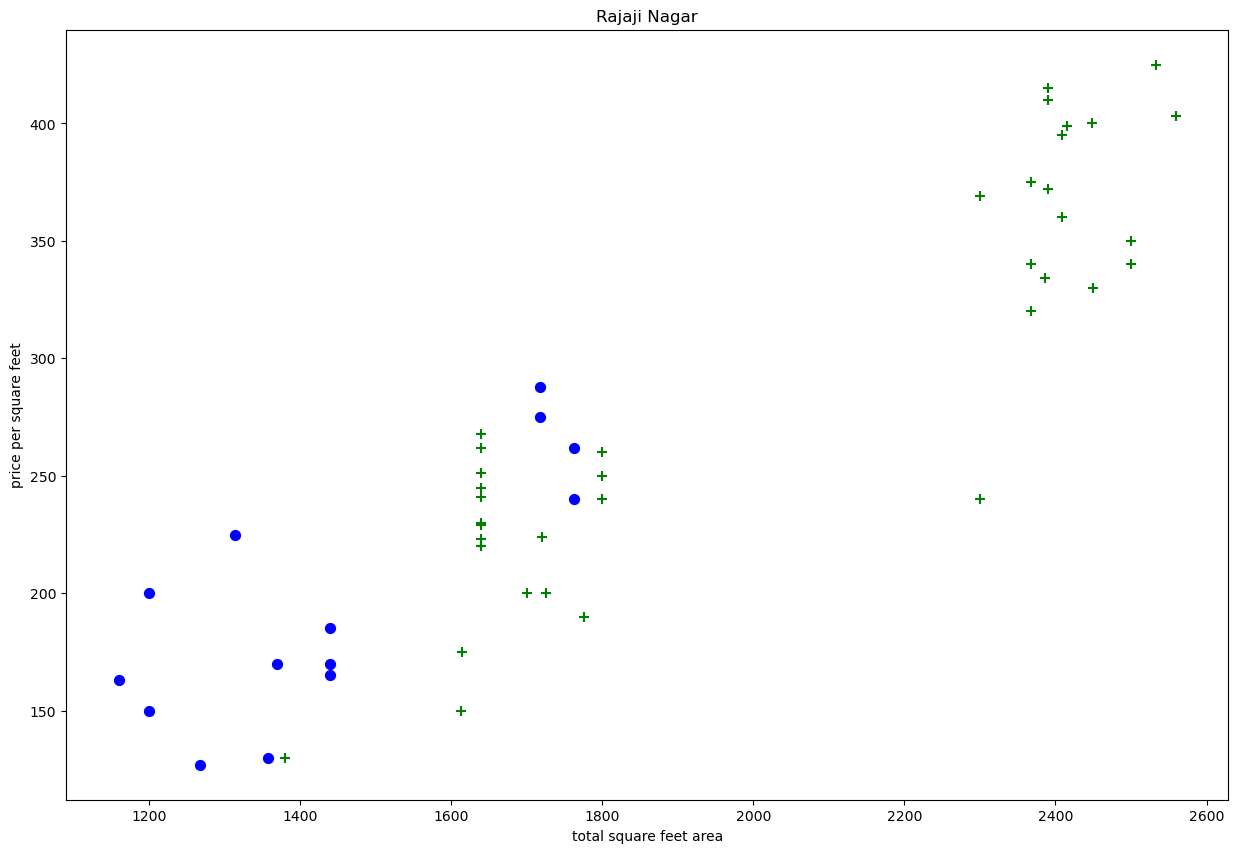

In [44]:
# now , we need to filter out the houses where price is more but the no.of bhk is less
# plotting joint graphs between 2,3 bhk houses with it's respective prices grouped by location 

def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2)] #creating 2 dataframes for 2 and 3 bhk rooms in the specific location
    bhk3=df[(df.location==location) & (df.bhk==3)] #creating 2 dataframes for 2 and 3 bhk rooms in the specific location
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 BHK',s=50)
    plt.xlabel("total square feet area")
    plt.ylabel("price per square feet")
    plt.title(location)
    plt.legend

plot_scatter_chart(df7,"Rajaji Nagar")
# example of abnormality = for ~~1700 area 2 bhk cost more than the 3 bhk in rajaji nagar 

############################### SO , DATA CLEANING WILL BE NEEDE IN THIS CASE AS WELL #########

In [45]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {} # creating a dictionary 
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean':np.mean(bhk_df.price_per_sqft), # calculating mean 
                'std':np.std(bhk_df.price_per_sqft), # calulating std 
                'count':bhk_df.shape[0] 
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices , bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values) # inputing the outliers in the exclude_indices array
    return df.drop(exclude_indices,axis='index')

remove_bhk_outliers(df7)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
10232,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
10233,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10236,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
10237,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


In [46]:
df8=remove_bhk_outliers(df7)
df8.shape # a lot of outliers were removed and the number of houses left came out to be 7329 

(7329, 7)

In [47]:
df8.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


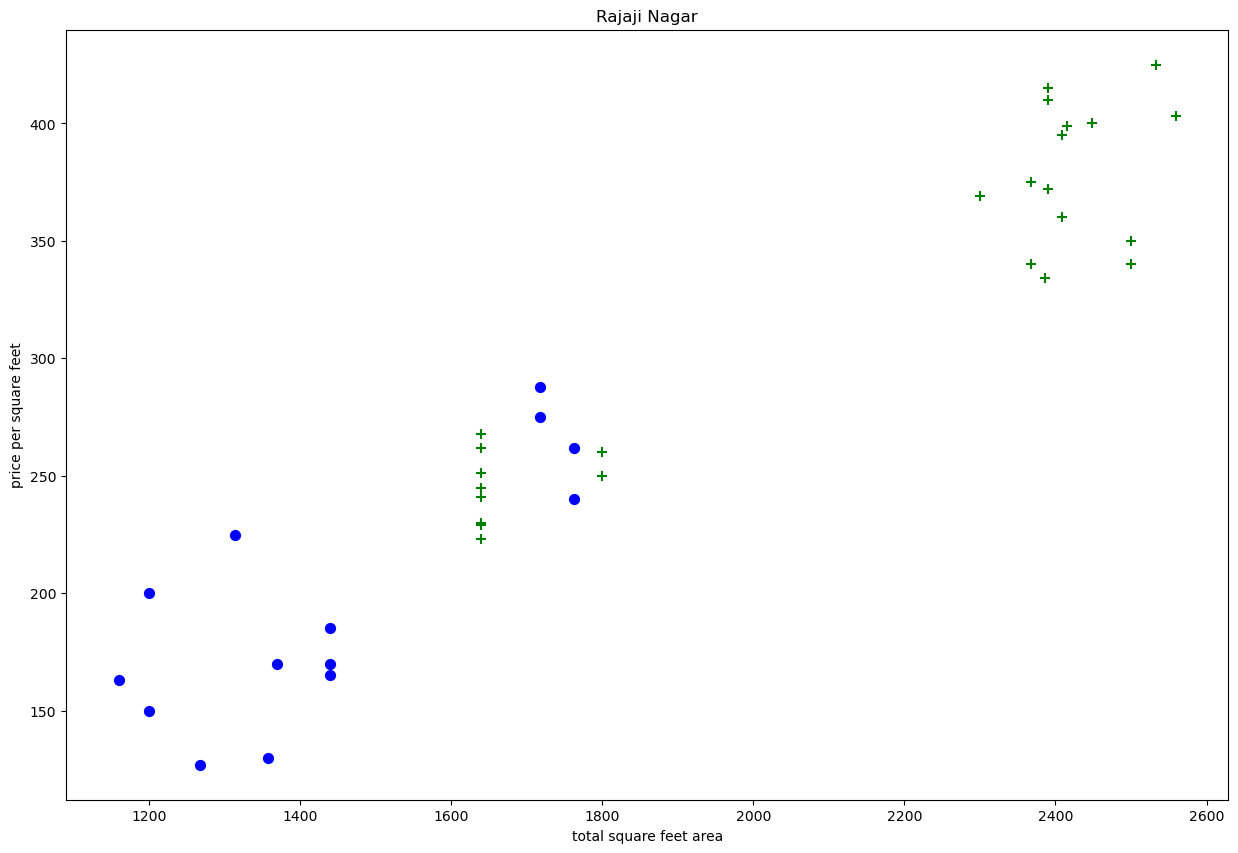

In [48]:
plot_scatter_chart(df8,"Rajaji Nagar")
# most of the abnormality data points are gone now . 
# not all abnormalities can be removed but maximum are ..

In [49]:
# bathrooms -
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [50]:
df8[df8.bath>10] # this '10' threshhold value can be given by a real estate professional 

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [51]:
a=df8[df8.bath>10]
len(a) # there are 5 houses with more than 10 bathrooms , which makes no sense , so we can consider them as outliers 

5

In [52]:
# the criteria we will be considering in this case is that any house with the no.of bathrooms more than the no.of rooms should be considered an outlier
df9=df8[df8.bath<df8.bhk+2]
df9.shape # more houses were removed and only 7251 houses were considered to be valid 

(7251, 7)

In [53]:
## FINAL DATFRAME (DF), WE WILL BE USING FOR MACHINE LEARNING MODEL -

In [54]:
# removing excess unnecesary columns
df=df9.drop(['size','price_per_sqft'],axis='columns')
df.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [55]:
# one hot encoding -
dummies = pd.get_dummies(df.location, dtype=int) # creates a true-false df for every location
dummies.head()                                   # use dtype=int to get integer type true-false instead of boolean 

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df11 = pd.concat([df,dummies.drop('other',axis='columns')],axis='columns') # we can remove 'other' column since if there is 0 in every location value then it makes sense that it's 'other' only 
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df12=df11.drop('location',axis='columns')
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
df12.shape

(7251, 245)

In [59]:
## SPLITTING THE FINAL DATAFRAME INTO X AND Y ARRAYS FOR REGRESSION 

In [60]:
X = df12.drop('price',axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
Y = df12.price
Y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=10) # which means 20% of the df12 will be in the test sample

In [63]:
## TRYING LINEAR_REGRESSION 

In [64]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression() # this calls the linearregression package from sklearn
regressor.fit(X_train,Y_train) # we train the model on X_train and Y_train
regressor.score(X_test,Y_test) # we test the model with the test dataset and generate a score on how good the model works 
# in this case the accuracy goes upto 84.5% , which seems decent 

0.8452277697874391

In [65]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5, test_size=0.2 , random_state=0) # creating a shuffle split for the cv sample 
cross_val_score(LinearRegression(),X,Y,cv=cv)

# this is just ways to check the accuracy of the model 
# u can see that majority of the time the score is above 80%

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [66]:
# uptil now , we only used linear regression , but there are other ways to predict values as well , 
# there is lasso regression , random forst regressor , xgboost and etc .
# to try different ways we will do the following 

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

# creating a function to train the above models -
def find_best_model(X,Y):
    algos={
        'linear_regression': {
            'model':LinearRegression(), # specifying algorithms and parameters
            'params': {                 # also called HYPER PARAMETER TUNING
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decison_tree': {
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0) # randomly shuffle sample for better results 
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,Y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model(X,Y)

C:\Users\amanm\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\amanm\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amanm\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\amanm\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\amanm\anaconda3\Lib\site-packages\

,model,best_score,best_params
0,linear_regression,0.819001,{'fit_intercept': False}
1,lasso,0.687449,"{'alpha': 1, 'selection': 'random'}"
2,decison_tree,0.717170,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [68]:
# the output shows that the best machine learning model for this situation is linear regression with the highest score and the best parameters are fit_intercept :false

In [69]:
# use regressor that was already created before 
# making a predict_price function
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >=0:
        x[loc_index] = 1
    return regressor.predict([x])[0]

predict_price('1st Phase JP Nagar',1000,2,2)
# the predicted price for the given inputs as location , sqft , bath and bhk comes out to be 83.5 lakhs

C:\Users\amanm\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.49904677211362

In [70]:
import pickle
with open('bangalore_home_prices_model.pickle','wb') as f: # imported all the coeffecients and the variables in a pickle file , saved on desktop
    pickle.dump(regressor,f)

In [71]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns] # converting columns into a lower case since there are different combination , hence it's better for everything to be in one way
}
with open("columns.json","w") as f:  # storing the columns as a json file 
    f.write(json.dumps(columns))

In [72]:
#### THE DATAFRAME HAS BEEN CREATED , THE MACHINE LEARNING PREDICTION MODEL WAS CHOSEN SUCCESFULLY , THE MODEL WAS DUMPED INTO A PICKLE FILE AND THE COLUMNS DATA WAS ALSO SAVED AND DUMPED INTO A JSON FILE --

In [73]:
### WRITING A PYTHON FLASK SERVER 